In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, ConfusionMatrixDisplay 

In [71]:
df_dados = pd.read_csv('df_total.csv', sep=',')
df_dados['status'].value_counts()

status
-1.0    410
 1.0    121
Name: count, dtype: int64

In [72]:

description = ['ch_cumprida',
                    'ch_cumprida_dividida', 'ch_reprovacao',
                    'taxa_reprovacao', 'semestre_total', 'semestre_dividido', 'matricula',
                      ]
description = df_dados[description]

In [73]:
description.describe()

,ch_cumprida,ch_cumprida_dividida,ch_reprovacao,taxa_reprovacao,semestre_total,semestre_dividido,matricula
count,531.000000,531.000000,531.000000,531.000000,531.000000,531.000000,531.000000
mean,1270.451977,0.694331,307.570621,0.323277,5.677966,0.708832,19.604520
std,803.969740,0.439295,283.643299,0.319611,3.898217,0.488408,12.663493
min,60.000000,0.030000,0.000000,0.000000,1.000000,0.120000,1.000000
25%,420.000000,0.230000,60.000000,0.065000,2.000000,0.250000,6.000000
50%,1230.000000,0.670000,270.000000,0.230000,5.000000,0.620000,18.000000
75%,1950.000000,1.070000,450.000000,0.460000,9.000000,1.120000,30.000000
max,3210.000000,1.750000,1620.000000,1.000000,16.000000,2.000000,50.000000


In [74]:
# Substituir -1 por 'evade' e 1 por 'not evade' na coluna 'status'
df_dados['status'] = df_dados['status'].replace({-1: 'evadido', 1: 'não evadido'})

# SVM

Acurácia do classificador SVM: 0.88125
Matriz de confusão:
[[111  13]
 [  6  30]]
Relatório de classificação:
              precision    recall  f1-score   support

     evadido       0.95      0.90      0.92       124
 não evadido       0.70      0.83      0.76        36

    accuracy                           0.88       160
   macro avg       0.82      0.86      0.84       160
weighted avg       0.89      0.88      0.88       160



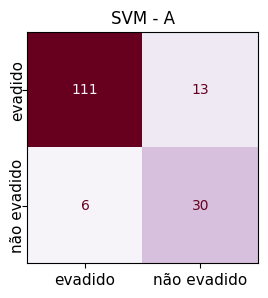

In [75]:
from sklearn.svm import SVC

# Filtrar as classes com mais de uma instância
class_counts = df_dados['status'].value_counts()
classes_to_keep = class_counts[class_counts > 1].index
df_filtered = df_dados[df_dados['status'].isin(classes_to_keep)]

# Separar as variáveis independentes e dependentes
x = df_filtered.drop(columns=['status']).to_numpy()
y = df_filtered['status'].to_numpy()

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)

# Treinar o classificador SVM
classifier = SVC(kernel='linear', C=1)
classifier.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = classifier.predict(X_test)

# Avaliar a precisão do classificador
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia do classificador SVM:", accuracy)

# Exibir a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de confusão:")
print(conf_matrix)

# Exibir o relatório de classificação
class_report = classification_report(y_test, y_pred)
print("Relatório de classificação:")
print(class_report)
# Exibir uma versão mais visual da matriz de confusão sem a colorbar
labels = np.unique(y_test)  # Obter os rótulos únicos
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=labels)
fig, ax = plt.subplots(figsize=(3, 3))
disp.plot(cmap=plt.cm.PuRd, ax=ax, colorbar=False)
plt.yticks(rotation=90, ha='center', va='center', fontsize=11)
plt.xticks(fontsize=11)
# Remover os rótulos dos eixos
ax.set_xlabel('')
ax.set_ylabel('')
plt.title('SVM - A', fontsize=12)
plt.show()


# Regressão Logística 

Matriz de confusão:
[[111  13]
 [  8  28]]
Accuracy: 0.86875
Classification Report:
              precision    recall  f1-score   support

     evadido       0.93      0.90      0.91       124
 não evadido       0.68      0.78      0.73        36

    accuracy                           0.87       160
   macro avg       0.81      0.84      0.82       160
weighted avg       0.88      0.87      0.87       160

Cross-Validation Scores: [nan nan nan nan nan]
Mean Cross-Validation Score: nan
Relatório de classificação:
              precision    recall  f1-score   support

     evadido       0.93      0.90      0.91       124
 não evadido       0.68      0.78      0.73        36

    accuracy                           0.87       160
   macro avg       0.81      0.84      0.82       160
weighted avg       0.88      0.87      0.87       160



/home/wanessa/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:1011: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/wanessa/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 137, in __call__
    score = scorer._score(
  File "/home/wanessa/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 345, in _score
    y_pred = method_caller(
  File "/home/wanessa/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 87, in _cached_call
    result, _ = _get_response_values(
  File "/home/wanessa/.local/lib/python3.10/site-packages/sklearn/utils/_response.py", line 203, in _get_response_values
    raise ValueError(
ValueError: pos_label=1 is not a valid label: It should be one of ['evadido' 'não evadido']

  warnings.warn(
/home/wanessa/.local/lib/python3.10/site-packages/sklearn/model_selection/_va

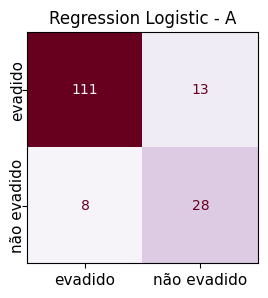

In [76]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score


# Filtrar as classes com mais de uma instância
class_counts = df_dados['status'].value_counts()
classes_to_keep = class_counts[class_counts > 1].index
df_filtered = df_dados[df_dados['status'].isin(classes_to_keep)]

# Separar as variáveis independentes e dependentes
X = df_filtered.drop(columns=['status']).to_numpy()
y = df_filtered['status'].to_numpy()


# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Criar e treinar o modelo de Regressão Logística com o solver liblinear
model = LogisticRegression(max_iter=2000, solver='liblinear', C=1.0)
model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Exibir a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de confusão:")
print(conf_matrix)

# Validação cruzada
cv_scores = cross_val_score(model, X, y, cv=5, scoring='f1')

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Cross-Validation Score: {cv_scores.mean()}")

# Exibir o relatório de classificação
class_report = classification_report(y_test, y_pred)
print("Relatório de classificação:")
print(class_report)
# Exibir uma versão mais visual da matriz de confusão sem a colorbar
labels = np.unique(y_test)  # Obter os rótulos únicos
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=labels)
fig, ax = plt.subplots(figsize=(3, 3))
disp.plot(cmap=plt.cm.PuRd, ax=ax, colorbar=False)
plt.yticks(rotation=90, ha='center', va='center', fontsize=11)
plt.xticks(fontsize=11)
# Remover os rótulos dos eixos
ax.set_xlabel('')
ax.set_ylabel('')
plt.title('Regression Logistic - A', fontsize=12)
plt.show()

# Decision Tree

Matriz de confusão:
[[117   7]
 [  8  28]]
Accuracy: 0.90625
Classification Report:
              precision    recall  f1-score   support

     evadido       0.94      0.94      0.94       124
 não evadido       0.80      0.78      0.79        36

    accuracy                           0.91       160
   macro avg       0.87      0.86      0.86       160
weighted avg       0.91      0.91      0.91       160



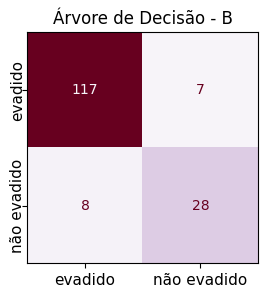

In [77]:
from sklearn.tree import DecisionTreeClassifier


# Filtrar as classes com mais de uma instância
class_counts = df_dados['status'].value_counts()
classes_to_keep = class_counts[class_counts > 1].index
df_filtered = df_dados[df_dados['status'].isin(classes_to_keep)]

# Separar as variáveis independentes e dependentes
X = df_filtered.drop(columns=['status']).to_numpy()
y = df_filtered['status'].to_numpy()

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Criar e treinar o modelo de Árvore de Decisão
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Exibir a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de confusão:")
print(conf_matrix)

# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

# Exibir uma versão mais visual da matriz de confusão sem a colorbar
labels = np.unique(y_test)  # Obter os rótulos únicos
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=labels)
fig, ax = plt.subplots(figsize=(3, 3))
disp.plot(cmap=plt.cm.PuRd, ax=ax, colorbar=False)
plt.yticks(rotation=90, ha='center', va='center', fontsize=11)
plt.xticks(fontsize=11)
# Remover os rótulos dos eixos
ax.set_xlabel('')
ax.set_ylabel('')
plt.title('Árvore de Decisão - B', fontsize=12)
plt.show()

# Random Forest

Matriz de confusão:
[[116   8]
 [  5  31]]
Acurácia: 0.91875
Relatório de Classificação:
              precision    recall  f1-score   support

     evadido       0.96      0.94      0.95       124
 não evadido       0.79      0.86      0.83        36

    accuracy                           0.92       160
   macro avg       0.88      0.90      0.89       160
weighted avg       0.92      0.92      0.92       160



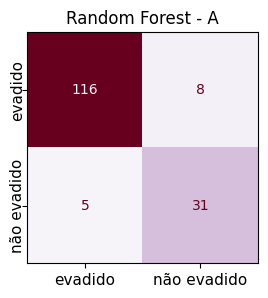

In [78]:
from sklearn.ensemble import RandomForestClassifier

# Filtrar as classes com mais de uma instância
class_counts = df_dados['status'].value_counts()
classes_to_keep = class_counts[class_counts > 1].index
df_filtered = df_dados[df_dados['status'].isin(classes_to_keep)]

# Separar as variáveis independentes e dependentes
x = df_filtered.drop(columns=['status']).to_numpy()
y = df_filtered['status'].to_numpy()

# Dividir os dados em conjunto de treinamento e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)

# Treinar o modelo de Random Forests
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)

# Fazer previsões
y_pred = rf_model.predict(x_test)

# Exibir a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de confusão:")
print(conf_matrix)

# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Acurácia: {accuracy}')
print('Relatório de Classificação:')
print(report)

# Exibir uma versão mais visual da matriz de confusão sem a colorbar
labels = np.unique(y_test)  # Obter os rótulos únicos
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=labels)
fig, ax = plt.subplots(figsize=(3, 3))
disp.plot(cmap=plt.cm.PuRd, ax=ax, colorbar=False)
plt.yticks(rotation=90, ha='center', va='center',fontsize=11)
plt.xticks(fontsize=11)
# Remover os rótulos dos eixos
ax.set_xlabel('')
ax.set_ylabel('')
plt.title('Random Forest - A',fontsize=12)
plt.show()


# Naive Bayes

Matriz de confusão:
[[91 33]
 [ 1 35]]
Acurácia: 0.7875
Relatório de Classificação:
              precision    recall  f1-score   support

     evadido       0.99      0.73      0.84       124
 não evadido       0.51      0.97      0.67        36

    accuracy                           0.79       160
   macro avg       0.75      0.85      0.76       160
weighted avg       0.88      0.79      0.80       160



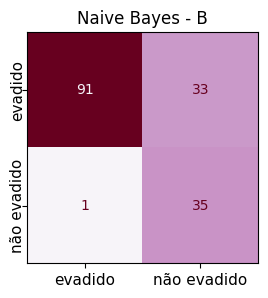

In [79]:
from sklearn.naive_bayes import GaussianNB

# Filtrar as classes com mais de uma instância
class_counts = df_dados['status'].value_counts()
classes_to_keep = class_counts[class_counts > 1].index
df_filtered = df_dados[df_dados['status'].isin(classes_to_keep)]

# Separar as variáveis independentes e dependentes
x = df_filtered.drop(columns=['status']).to_numpy()
y = df_filtered['status'].to_numpy()

# Dividir os dados em conjunto de treinamento e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)

# Treinar o modelo de Naive Bayes
nb_model = GaussianNB()
nb_model.fit(x_train, y_train)

# Fazer previsões
y_pred = nb_model.predict(x_test)

# Exibir a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de confusão:")
print(conf_matrix)

# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Acurácia: {accuracy}')
print('Relatório de Classificação:')
print(report)

# Exibir uma versão mais visual da matriz de confusão sem a colorbar
labels = np.unique(y_test)  # Obter os rótulos únicos
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=labels)
fig, ax = plt.subplots(figsize=(3, 3))
disp.plot(cmap=plt.cm.PuRd, ax=ax, colorbar=False)
plt.yticks(rotation=90, ha='center', va='center', fontsize=11)
plt.xticks(fontsize=11)
# Remover os rótulos dos eixos
ax.set_xlabel('')
ax.set_ylabel('')
plt.title('Naive Bayes - B', fontsize=12)
plt.show()


# K-Nearest Neighbors

Acurácia: 0.875
Relatório de Classificação:
              precision    recall  f1-score   support

     evadido       0.93      0.91      0.92       124
 não evadido       0.71      0.75      0.73        36

    accuracy                           0.88       160
   macro avg       0.82      0.83      0.82       160
weighted avg       0.88      0.88      0.88       160

Matriz de Confusão:
[[113  11]
 [  9  27]]


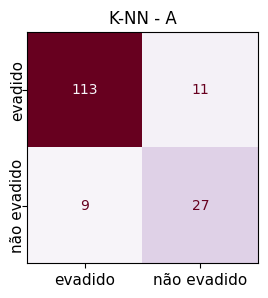

In [80]:
from sklearn.neighbors import KNeighborsClassifier

# Filtrar as classes com mais de uma instância
class_counts = df_dados['status'].value_counts()
classes_to_keep = class_counts[class_counts > 1].index
df_filtered = df_dados[df_dados['status'].isin(classes_to_keep)]

# Separar as variáveis independentes e dependentes
x = df_filtered.drop(columns=['status']).to_numpy()
y = df_filtered['status'].to_numpy()

# Dividir os dados em conjunto de treinamento e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)

# Treinar o modelo de K-NN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train, y_train)

# Fazer previsões
y_pred = knn_model.predict(x_test)

# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Acurácia: {accuracy}')
print('Relatório de Classificação:')
print(report)
print('Matriz de Confusão:')
print(conf_matrix)

# Exibir uma versão mais visual da matriz de confusão sem a colorbar
labels = np.unique(y_test)  # Obter os rótulos únicos
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=labels)
fig, ax = plt.subplots(figsize=(3, 3))
disp.plot(cmap=plt.cm.PuRd, ax=ax, colorbar=False)
plt.yticks(rotation=90, ha='center', va='center',fontsize=11)
plt.xticks(fontsize=11)
# Remover os rótulos dos eixos
ax.set_xlabel('')
ax.set_ylabel('')
plt.title('K-NN - A', fontsize=12)
plt.show()

# AdaBoost

Acurácia: 0.894
Relatório de Classificação:
              precision    recall  f1-score   support

     evadido       0.95      0.91      0.93       124
 não evadido       0.73      0.83      0.78        36

    accuracy                           0.89       160
   macro avg       0.84      0.87      0.85       160
weighted avg       0.90      0.89      0.90       160

Matriz de Confusão:
[[113  11]
 [  6  30]]


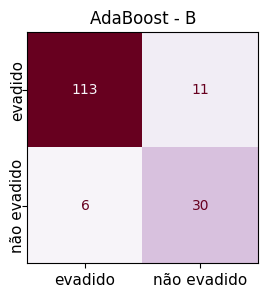

In [81]:
from sklearn.ensemble import AdaBoostClassifier

# Filtrar as classes com mais de uma instância
class_counts = df_dados['status'].value_counts()
classes_to_keep = class_counts[class_counts > 1].index
df_filtered = df_dados[df_dados['status'].isin(classes_to_keep)]

# Separar as variáveis independentes e dependentes
x = df_filtered.drop(columns=['status']).to_numpy()
y = df_filtered['status'].to_numpy()

# Dividir os dados em conjunto de treinamento e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)

# Treinar o modelo de AdaBoost com o algoritmo SAMME
adaboost_model = AdaBoostClassifier(n_estimators=50, algorithm='SAMME', random_state=42)
adaboost_model.fit(x_train, y_train)

# Fazer previsões
y_pred = adaboost_model.predict(x_test)

# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Acurácia: {accuracy:.3f}')
print('Relatório de Classificação:')
print(report)
print('Matriz de Confusão:')
print(conf_matrix)

# Exibir uma versão mais visual da matriz de confusão sem a colorbar
labels = np.unique(y_test)  # Obter os rótulos únicos
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=labels)
fig, ax = plt.subplots(figsize=(3, 3))
disp.plot(cmap=plt.cm.PuRd, ax=ax, colorbar=False)
plt.yticks(rotation=90, ha='center', va='center', fontsize=11)
plt.xticks(fontsize=11)
# Remover os rótulos dos eixos
ax.set_xlabel('')
ax.set_ylabel('')
plt.title('AdaBoost - B', fontsize=12)
plt.show()


# Neural Net

Acurácia: 0.887
Relatório de Classificação:
              precision    recall  f1-score   support

     evadido       0.98      0.87      0.92       124
 não evadido       0.68      0.94      0.79        36

    accuracy                           0.89       160
   macro avg       0.83      0.91      0.86       160
weighted avg       0.91      0.89      0.89       160

Matriz de Confusão:
[[108  16]
 [  2  34]]


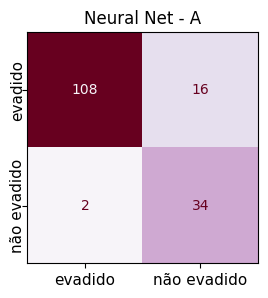

In [82]:
from sklearn.neural_network import MLPClassifier

# Filtrar as classes com mais de uma instância
class_counts = df_dados['status'].value_counts()
classes_to_keep = class_counts[class_counts > 1].index
df_filtered = df_dados[df_dados['status'].isin(classes_to_keep)]

# Separar as variáveis independentes e dependentes
x = df_filtered.drop(columns=['status']).to_numpy()
y = df_filtered['status'].to_numpy()

# Dividir os dados em conjunto de treinamento e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)


# Definir e treinar o modelo de rede neural
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
mlp_model.fit(x_train, y_train)

# Fazer previsões
y_pred = mlp_model.predict(x_test)

# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Acurácia: {accuracy:.3f}')
print('Relatório de Classificação:')
print(report)
print('Matriz de Confusão:')
print(conf_matrix)

# Exibir uma versão mais visual da matriz de confusão sem a colorbar
labels = np.unique(y_test)  # Obter os rótulos únicos
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=labels)
fig, ax = plt.subplots(figsize=(3, 3))
disp.plot(cmap=plt.cm.PuRd, ax=ax, colorbar=False)
plt.yticks(rotation=90, ha='center', va='center', fontsize=11)
plt.xticks(fontsize=11)
# Remover os rótulos dos eixos
ax.set_xlabel('')
ax.set_ylabel('')
plt.title('Neural Net - A', fontsize=12)
plt.show()

# QDA

Acurácia: 0.919
Relatório de Classificação:
              precision    recall  f1-score   support

     evadido       0.99      0.90      0.95       124
 não evadido       0.74      0.97      0.84        36

    accuracy                           0.92       160
   macro avg       0.87      0.94      0.89       160
weighted avg       0.94      0.92      0.92       160

Matriz de Confusão:
[[112  12]
 [  1  35]]


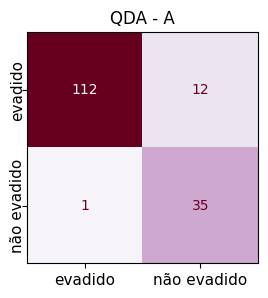

In [83]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# Filtrar as classes com mais de uma instância
class_counts = df_dados['status'].value_counts()
classes_to_keep = class_counts[class_counts > 1].index
df_filtered = df_dados[df_dados['status'].isin(classes_to_keep)]

# Separar as variáveis independentes e dependentes
x = df_filtered.drop(columns=['status']).to_numpy()
y = df_filtered['status'].to_numpy()

# Dividir os dados em conjunto de treinamento e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)

# Treinar o modelo de QDA
qda_model = QuadraticDiscriminantAnalysis()
qda_model.fit(x_train, y_train)

# Fazer previsões
y_pred = qda_model.predict(x_test)

# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Acurácia: {accuracy:.3f}')
print('Relatório de Classificação:')
print(report)
print('Matriz de Confusão:')
print(conf_matrix)

# Exibir uma versão mais visual da matriz de confusão sem a colorbar
labels = np.unique(y_test)  # Obter os rótulos únicos
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=labels)
fig, ax = plt.subplots(figsize=(3, 3))
disp.plot(cmap=plt.cm.PuRd, ax=ax, colorbar=False)
plt.yticks(rotation=90, ha='center', va='center', fontsize=11)
plt.xticks(fontsize=11)
# Remover os rótulos dos eixos
ax.set_xlabel('')
ax.set_ylabel('')
plt.title('QDA - A', fontsize=12)
plt.show()

# Gaussian Process

Acurácia: 0.875
Relatório de Classificação:
              precision    recall  f1-score   support

     evadido       0.95      0.89      0.92       124
 não evadido       0.68      0.83      0.75        36

    accuracy                           0.88       160
   macro avg       0.82      0.86      0.83       160
weighted avg       0.89      0.88      0.88       160

Matriz de Confusão:
[[110  14]
 [  6  30]]


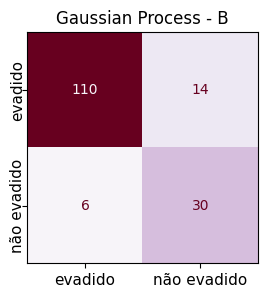

In [84]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

# Filtrar as classes com mais de uma instância
class_counts = df_dados['status'].value_counts()
classes_to_keep = class_counts[class_counts > 1].index
df_filtered = df_dados[df_dados['status'].isin(classes_to_keep)]

# Separar as variáveis independentes e dependentes
x = df_filtered.drop(columns=['status']).to_numpy()
y = df_filtered['status'].to_numpy()

# Dividir os dados em conjunto de treinamento e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)

# Definir o modelo de Gaussian Process com um kernel RBF (Radial Basis Function)
kernel = 1.0 * RBF(1.0)
gpc_model = GaussianProcessClassifier(kernel=kernel, random_state=42)

# Treinar o modelo
gpc_model.fit(x_train, y_train)

# Fazer previsões
y_pred = gpc_model.predict(x_test)

# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Acurácia: {accuracy:.3f}')
print('Relatório de Classificação:')
print(report)
print('Matriz de Confusão:')
print(conf_matrix)

# Exibir uma versão mais visual da matriz de confusão sem a colorbar
labels = np.unique(y_test)  # Obter os rótulos únicos
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=labels)
fig, ax = plt.subplots(figsize=(3, 3))
disp.plot(cmap=plt.cm.PuRd, ax=ax, colorbar=False)
plt.yticks(rotation=90, ha='center', va='center', fontsize=11)
plt.xticks(fontsize=11)
# Remover os rótulos dos eixos
ax.set_xlabel('')
ax.set_ylabel('')
plt.title('Gaussian Process - B', fontsize=12)
plt.show()
